# Problem Set #3 (Task #2 & #3)
## Name: Sahithi Adari
### Date: 10/19/2020

In [19]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

## Task 2: Visualization

1. Using dataset 1, please generate a bar graph where country names are located on the y-axis and the number of BITs are on the x-axis. Countries should be in descending order according to the total number of BITs. The bar graphs should contain two fill colors: one denoting the number of BITs that are currently active (i.e. “in force”) and the other denoting the number of inactive BITs.

In [3]:
#Established a connection with the database
conn = sqlite3.connect("ps3_db.sqlite")

#Listed off all the tables in the sqlite database
pd.read_sql("select name from sqlite_master where type='table'",conn)

,name
0,country_level
1,dyad_level


In [7]:
#Created an SQLite query subtracting 'n_bits' by 'n_bits_active' to get the inactive bits and saved that column as 'inactive_bits'
#Grouped these valued by 'country' and ordered by 'n_bits' decending
query = '''
select n_bits - n_bits_active as inactive_bits,
			country,
			n_bits_active
from country_level
group by country ORDER by n_bits, country, inactive_bits DESC;
'''

#Saved the SQLite query as a Pandas dataframe called 'country_bit'
country_bit = pd.read_sql(query,conn)

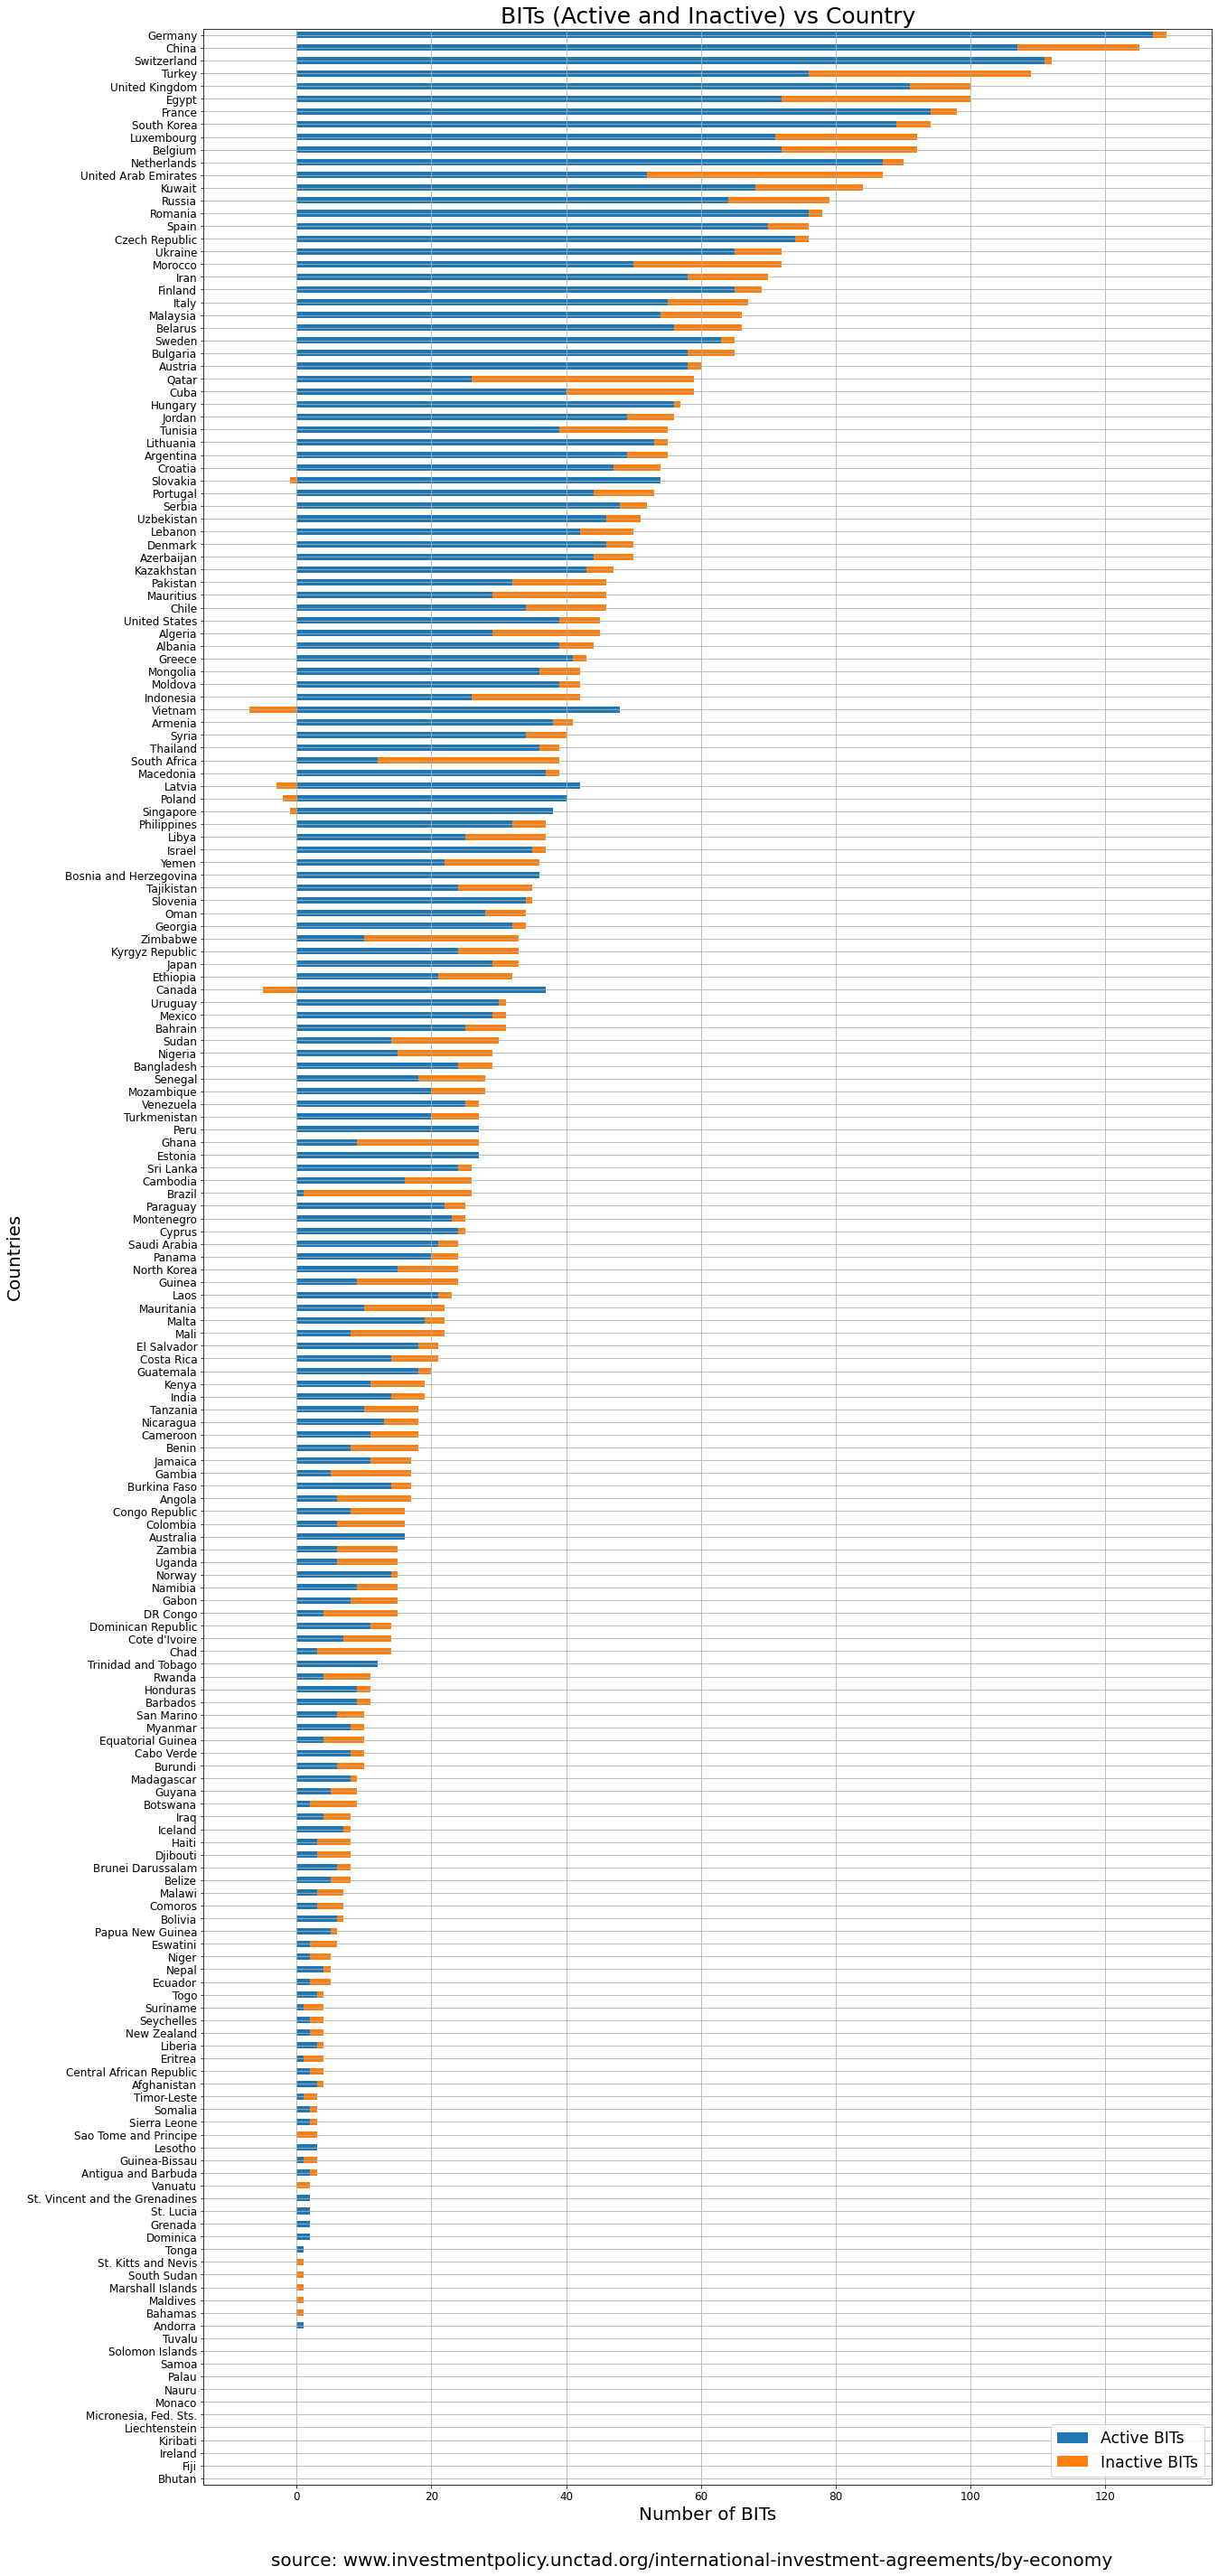

In [8]:
#Plotted a stacked, horizontal barchart of the number of active bits using the 'country_bit' dataframe
country_bit[["country", "n_bits_active", "inactive_bits"]].plot(figsize = (20,50), kind="barh", stacked = True)
plt.grid() #Inserted a grid background
plt.title("BITs (Active and Inactive) vs Country", fontsize = 25)
plt.yticks(ticks = np.arange(193), labels = country_bit.country, fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel("Number of BITs", fontsize = 20)
plt.ylabel("Countries", fontsize = 20)
plt.legend(["Active BITs", "Inactive BITs"],loc = 'lower right', fontsize = 'xx-large') #Moved the legend to the bottom corner of the graph
plt.figtext(0.5, #Added the source info at the bottom of the plot
            0.1,
            "source: www.investmentpolicy.unctad.org/international-investment-agreements/by-economy",
            wrap=True,
            horizontalalignment='center',
            fontsize=20)
plt.savefig('figures/country_bit.png', dpi = 300) #Saved the figure as 'country_bit.png' within the figure folder

2. Using dataset 2, please generate a line plot that tracks the year on the x-axis and the number of “net new” active BITs on the y-axis, where the number of “net new” BITs equals the number of new BITs that began to be enforced in a given year minus the number of BITs that are terminated in a given year.

In [12]:
#Created an SQLite query subtracting the count of 'year_enforced' by the count of 'year_terminated' and saved this value to a column called 'new_per_year'
#Grouped these valued by 'year_signed'
query_2 = '''
select count(year_enforced) - count(year_terminated) as new_per_year,
		  year_signed
from dyad_level
group by year_signed
'''

#Saved the SQLite query as a Pandas dataframe called 'new_bit'
new_bit = pd.read_sql(query_2,conn)

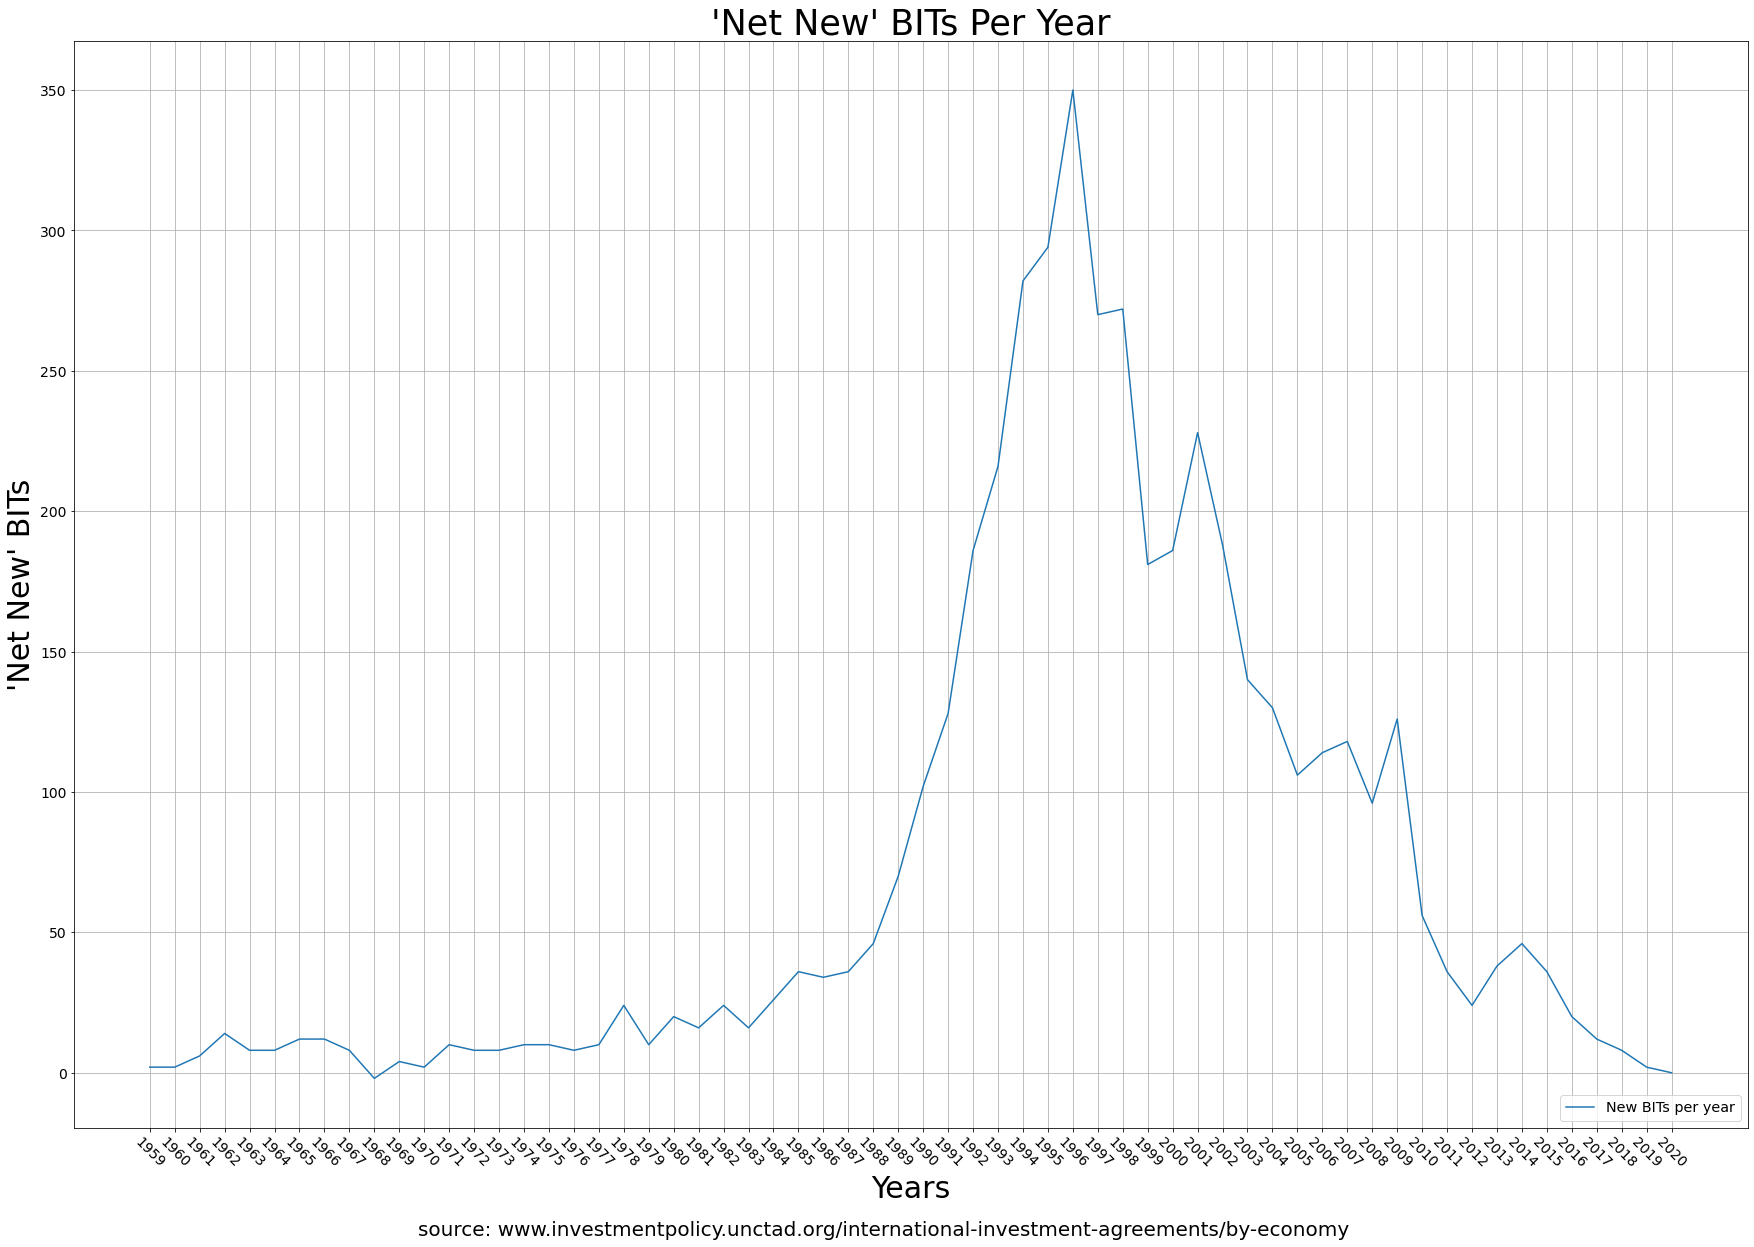

In [13]:
#Plotted a line graph of the number of 'net new' BITs against years using the 'new_bit' dataframe
new_bit[["new_per_year"]].plot(figsize = (30,20), kind = "line")
plt.grid() #Inserted a grid background
plt.title("'Net New' BITs Per Year", fontsize = 35)
plt.xticks(ticks = np.arange(62), labels = new_bit.year_signed, fontsize = 14, rotation= -45)
plt.yticks(fontsize = 14)
plt.xlabel("Years", fontsize = 30)
plt.ylabel("'Net New' BITs", fontsize = 30)
plt.legend(["New BITs per year"],loc = 'lower right', fontsize = 'x-large') #Moved the legend to the bottom corner of the graph
plt.figtext(0.5, #Added the source info at the bottom of the plot
            0.05,
            "source: www.investmentpolicy.unctad.org/international-investment-agreements/by-economy",
            wrap=True,
            horizontalalignment='center',
            fontsize=20)
plt.savefig('figures/new_bits.png', dpi = 300) #Saved the figure as 'new_bits.png' within the figure folder

3. Using dataset 2, please generate a tile plot where the y-axis is composed of the following countries — “United States”, “Russia”, “Germany”, and “China” — and the x-axis is every other UN member country in the data (excluding the “United States”, “Russia”, “Germany”, and “China”). The tiles should be filled with a color of your choosing if the country on the x-axis is engaged in a currently active BIT agreement with the corresponding country on the y-axis.

In [14]:
#Created an SQLite selecting 'country_A' and 'country_B' column by the following 2 conditions:
#'country_A' can only include "United States", "Russia", "Germany", "China"
#'country_B' excludes "United States", "Russia", "Germany", "China"
#Remapped the status column for better data visualization as the 'status_mapping' column
query_3 = '''
select
	country_A,
	country_B, 
	(case when status == "active" then "Active" else "Not Active" end) as status_mapping	
from dyad_level
where country_A in ("United States", "Russia", "Germany", "China") and country_B not in ("United States", "Russia", "Germany", "China");
'''

#Saved the SQLite query as a Pandas dataframe called 'UN_bit'
UN_bit = pd.read_sql(query_3,conn)

In [15]:
#Saved this ggplot as 'UN_bit_graph'
UN_bit_graph = (ggplot(UN_bit, aes('country_B', 'country_A'))
 + geom_tile(aes(fill = 'status_mapping'), UN_bit) #Set the legend as the "status_mapping"
 + theme(axis_text_x = element_text(angle = -90, vjust = 1, hjust= 1, size = 30), #Rotated the x-axis labels
         axis_text_y = element_text(size = 50),
         axis_title_x = element_text(size = 60),
         axis_title_y = element_text(size = 80),
         plot_title = element_text(size = 80),
         legend_title = element_text(size = 50, margin = {'b': 20}),
         legend_text = element_text(size = 40),
         legend_key_size = 80,
         figure_size=(80, 40))
 + labs(title = "BITs Agreement Heatmap for USA, Russia, Germany, and China",
        #Used the ISO3c codes of the countries for the x and y labels
        #Added the source as part of the x-axis label as plotnine doesn't currently support the 'caption' arguement
        x = "UN Members (Excluding USA, RUS, DEU, and CHN) \n\nsource: www.investmentpolicy.unctad.org/international-investment-agreements/by-economy",
        y = "USA, RUS, DEU, CHN", fill = "Status") #Renamed the legend as 'Status'
)

In [18]:
#Saved the ggplot as 'UN_bit_graph.png' and ignored the size limit given that there are a lot of countries being mapped
ggsave(plot = UN_bit_graph, path = "figures", filename = "UN_bit_graph" +'.png', dpi = 300, limitsize = False)

/Users/endor/Library/Python/3.8/lib/python/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 80 x 40 in image.
/Users/endor/Library/Python/3.8/lib/python/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/UN_bit_graph.png


## Task 3: Insights

1. Referring to plot 1, are there certain characteristics about countries that sign many BIT agreements vis-a-vis those that sign few? You may reference other data (such as regime type or GDP data used in class) to investigate your claim.

The first thing to note about the data is that there is a data discrepancy for certain countries where the number of active BITs are greater than the total BITs. These countries include: Slovakia, Vietnam, Latvia, Poland, Singapore, and Canada. As the website itself states: "Stated number of BITs/TIPs does not include treaties that have been denounced, terminated by mutual consent or renegotiated."

Putting that note aside, I think a really important distinction to make, especially with this set of data, is the different between a BITs "recipient" and a BITs "donor". A high number of BITs can either mean lots of investments going into the country by another country, or lots of investments going out of the country to another country; we don’t know what the true picture is without taking additional factors into consideration.

We can see this at play by comparing Germany and Egypt whom are, according to this data, part of the top 10 countries with the greatest number of BITs. If we just look at GDP per capita, Germany comes in at 47,608.03 Trillion whereas Egypt comes in at 2,549.13 Trillion in 2018. Now we can make an educated assumption that German companies are probably making these agreements in foreign countries whereas Egyptian companies are the receiver of said agreements.

In general countries with strong economies, a relatively free and open marketplace, as well as multiple multinational corporations (such as what is found in Germany) are more likely to have multiple BITs agreements. Countries with the opposite of this—smaller economies, more national corporations, and a marketplace going through market liberalization policies—, like Egypt, are also likely to have multiple BITs agreement as they would be the recipient.

* https://www.reuters.com/article/us-china-economy-fdi/chinas-2019-fdi-up-5-8-outbound-investment-slumps-idUSKBN1ZK05I 
* https://en.wikipedia.org/wiki/Germany
* https://en.wikipedia.org/wiki/Egypt

2. Referring to plot 2, are there moments in time when countries entered into more or less BIT agreements? If so, can you speculate why?

The biggest growth, in terms of new BITs agreements, happened during the year of 1996. An old WTO paper, from 1996, attributes this growth as a shrinking of the gap between world output and world demand. Up until that point, demand had far exceeded actual output and this has been made clear by the steadily increasing number of BITs up until 1996. It appears that private companies were scrambling to get the demand met and, in 1996, that demand was met for the first time.

Almost immediately after we can see massive falls in BITs agreement with the dot com bubble burst of the 2000s and 9/11 being the most dramatic drops.

https://www.wto.org/english/res_e/focus_e/focus18_e.pdf

3. Referring to plot 3, does one country (among the four on the x-axis) enter into noticeably more or fewer BITs than the other three? If so, what is it about this country compared to the other three that might explain this difference?

As mentioned previously, Germany has entered into noticeably more BITs than the other three. I think this is due, in large part, to their absolutely booming and thriving economy. The fact that Germany, almost singlehandedly, kept the EU afloat, and bailed out Greece during the Great Recession speaks to this strength. They are the 4th largest economy in the world, continue to maintain a budget surplus, house 53 of the top 2000 multinational corporations, had the largest trade surplus in 2016, and account for 28% of the total area economy for Europe.

All in all, they are an economic juggernaut especially coming from a country the size of Montana. Given their economic prowess and fiscal responsibility, they are rightly so, an extremely attractive BITs partner to have.

On the other end we have the United States, which has entered into noticeably fewer BITs than the other three nations. Although America has the second largest economy in the world, a GDP of 20.8 trillion dollars and high level of foreign investment stocks, the US is particularly picky with whom to enter into BITs agreement with. This can be due to geopolitical concerns, intellectual property concerns, etc.

One thing I do want to note is that although America does not participate in the majority of BITs agreements, we are still the 2nd largest provider of FDI (foreign direct investment or the umbrella term that BITs falls into).

* https://en.wikipedia.org/wiki/Economy_of_Germany
* https://en.wikipedia.org/wiki/List_of_countries_by_FDI_abroad
* https://en.wikipedia.org/wiki/Economy_of_the_United_States